<a href="https://colab.research.google.com/github/shruthireddyrekula/Image_classification_cifar10_tf/blob/main/CIFAR10_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
x_train.shape


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train = x_train/255
x_test = x_test/255

# Flatten the images (reshape to a 1D array) for the MLP input
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:

model = tf.keras.Sequential([
   Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
   Dropout(0.2),
   Dense(256, activation='relu'),
   Dropout(0.2),
   Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=100,
                    validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 18s 43ms/step - loss: 1.9928 - accuracy: 0.2765 - val_loss: 1.7954 - val_accuracy: 0.3584
Epoch 2/100
391/391 [==============================] - 18s 47ms/step - loss: 1.8100 - accuracy: 0.3460 - val_loss: 1.7054 - val_accuracy: 0.3877
Epoch 3/100
391/391 [==============================] - 16s 40ms/step - loss: 1.7504 - accuracy: 0.3676 - val_loss: 1.6291 - val_accuracy: 0.4255
Epoch 4/100
391/391 [==============================] - 17s 42ms/step - loss: 1.7054 - accuracy: 0.3862 - val_loss: 1.6167 - val_accuracy: 0.4208
Epoch 5/100
391/391 [==============================] - 16s 41ms/step - loss: 1.6888 - accuracy: 0.3886 - val_loss: 1.5853 - val_accuracy: 0.4386
Epoch 6/100
391/391 [==============================] - 17s 44ms/step - loss: 1.6537 - accuracy: 0.4051 - val_loss: 1.5771 - val_accuracy: 0.4400
Epoch 7/100
391/391 [==============================] - 16s 40ms/step - loss: 1.6328 - accuracy: 0.4113 - val_loss: 1.5874 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4187 - accuracy: 0.5049


In [ ]:
print('Test_loss',test_loss)
print('Test_accuracy', test_acc)

Test_loss 1.418736457824707
Test_accuracy 0.5048999786376953


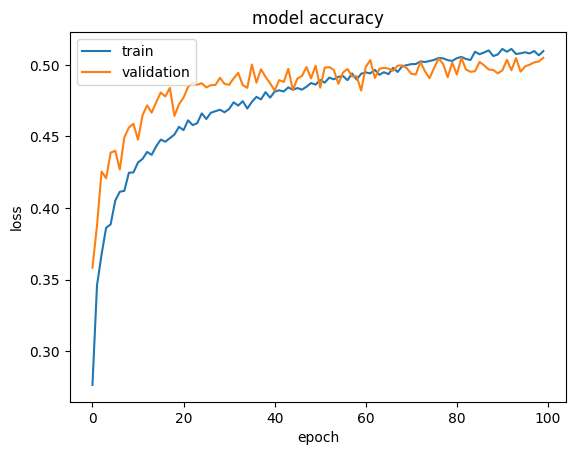

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()